# Sistem Rekomendasi Musik

Nama : Renol N

Asal : Majalengka

Kenapa menggunakan Kaggle Notebook ? Google Colab Limit Memory Check Specification of Kaggle Memory
![](https://miro.medium.com/max/1400/1*WeJ3Gtr9D-k31lCoj_5rvw@2x.jpeg)

In [1]:
# Extract Datasets nya
!7z e "../input/kkbox-music-recommendation-challenge/train.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/members.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/songs.csv.7z"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/kkbox-music-recommendation-challeng                                                      1 file, 106420688 bytes (102 MiB)

Extracting archive: ../input/kkbox-music-recommendation-challenge/train.csv.7z
--
Path = ../input/kkbox-music-recommendation-challenge/train.csv.7z
Type = 7z
Physical Size = 106420688
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      1% - train.c                4% - train.c                6% - train.c                7% - train.c                9% - train.c               12% - train.c               14% - train.c               16% - train.c               18% - train.c               21% - train.c               23% - train.c               25% - train.c               28% - train.c               30% - train.c     

# Data Understanding

Memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan.

Menuliskan tautan sumber data (link download). 
https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data

Menguraikan seluruh variabel atau fitur pada data.

Melakukan beberapa tahapan yang diperlukan mengenai data, contohnya teknik visualisasi data beserta insight atau exploratory data analysis.

## Answers of Data Understanding

### 1
#### train.csv : (7377418 data, 6 columns)
    
    msno: user id
    
    song_id: song id
    
    source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    
    source_screen_name: name of the layout a user sees.
    
    source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
    
    target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .
#### test.csv : (data, columns)
    
    id: row id (will be used for submission)
    
    msno: user id
    
    song_id: song id
    
    source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    
    source_screen_name: name of the layout a user sees.
    
    source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
    
#### sample_submission.csv (We not use this file)

#### songs.csv
The songs. Note that data is in unicode.

    song_id
    
    song_length: in ms
    
    genre_ids: genre category. Some songs have multiple genres and they are separated by |
    
    artist_name
    
    composer
    
    lyricist
    
    language

#### members.csv
user information.

    msno
    
    city
    
    bd: age. Note: this column has outlier values, please use your judgement.
    
    gender
    
    registered_via: registration method
    
    registration_init_time: format %Y%m%d
    
    expiration_date: format %Y%m%d
    
    song_extra_info.csv
    
    song_id
    
    song name - the name of the song.
    
    isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.
    
### 2

https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data

### 3

Check Output Execution Code

### 4

Check Output Execution Code

In [2]:
import pandas as pd
train_data = pd.read_csv('./train.csv')
songs = pd.read_csv('./songs.csv')
member = pd.read_csv('./members.csv')

train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [4]:
member.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [7]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [8]:
print("Shape Train Data : ", train_data.shape)
print("Shape Songs Data : ", songs.shape)
print("Shape Songs Info Data : ", member.shape)

Shape Train Data :  (7377418, 6)
Shape Songs Data :  (2296320, 7)
Shape Songs Info Data :  (34403, 7)


In [9]:
import numpy as np
df_all = np.concatenate([
    train_data.song_id.unique(),
    songs.song_id.unique(),
    member.msno.unique()
])

df_all = np.sort(np.unique(df_all))

print("Jumlah seluruh datasets: ", len(df_all))

Jumlah seluruh datasets:  2330363


In [10]:
# Merge

df = pd.merge(train_data, songs, on='song_id', how='left')

df = pd.merge(df, member, on='msno', how='left')
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 1.0+ GB


In [12]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,33888,3178798,0.430882
gender,object,2,2961479,0.401425
composer,object,76064,1675706,0.227140
source_screen_name,object,20,414804,0.056226
genre_ids,object,572,118455,0.016056
source_system_tab,object,8,24849,0.003368
source_type,object,12,21539,0.002920
language,float64,10,150,0.000020
song_length,float64,60266,114,0.000015
artist_name,object,40582,114,0.000015


# Data Preparation

Menerapkan dan menyebutkan teknik data preparation yang dilakukan.

Teknik yang digunakan pada notebook dan laporan harus berurutan.

Menjelaskan proses data preparation yang dilakukan.

Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.

Handling null Value, ini perlu sebab data yang digunakan jauh dari kata bersih / clean

In [13]:
df.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178798
language                      150
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344896 entries, 6 to 7377401
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 339.9+ MB


In [17]:
df.shape

(2344896, 18)

Filter Column yang akan kita gunakan, ini perlu karena tidak semua kolom akan kita gunakan, hanya kolom yang dirasa akan dibutuhkan oleh requirement tim pengembang

In [18]:
used_columns = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'artist_name', 'genre_ids', 'composer', 'gender']
new_df = df[used_columns]

In [19]:
new_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,composer,gender
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,BIGBANG TAEYANG,465,TEDDY| DEE.P| Rebecca Johnson,female
11,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,8FGjC9W+7F8WjheGZPAwX9RH3+nWSO7DzjM6EB6naOI=,my library,Local playlist more,local-library,1,嚴爵 (Yen-j),465,嚴爵,male
19,uQQHTQJ1nVEkBfbXe0f1/J9ML5eQhsQiocCV5TvvCRI=,9yi9yLGK5Soiz1IO3iosDsx5O3hutglBHl1JbVHLjLw=,my library,Local playlist more,local-library,1,孫燕姿 (Yanzi Sun),465,Li Wei Song,female
21,uQQHTQJ1nVEkBfbXe0f1/J9ML5eQhsQiocCV5TvvCRI=,H0pfaBjENAn1eYhCA5+rurd8AnnJF17J512SKZBfvfU=,my library,Local playlist more,local-library,1,莫文蔚 (Karen Mok),465,Skot Suyama,female
32,ULaS7iTeNVqlI45nQEFyye+QRhPy1TvABDDu8AXool0=,2bj5oqCPPzY6E0TPgwySkfj8/l/c+DVQBqnABx0qPSk=,my library,Local playlist more,local-library,1,蛋堡 (Soft Lipa),1259,杜振熙,male


In [20]:
new_df.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
artist_name           0
genre_ids             0
composer              0
gender                0
dtype: int64

Banyak value yang unbalance, misal di bagian genre, ada 1 genre berisi 50.000 value sedangkan ada genre yang hanya berisi 1 value... maka dari itu akan kita proses genre yang value nya kurang dari 1000 akan kita drop atau hapus

In [21]:
for column in new_df.columns:
 print("\n" + column)
 print(new_df[column].value_counts())


msno
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    2404
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    2398
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    2093
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    1781
hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=    1750
                                                ... 
oH8NNr1QRbzL29JQBKwCKM0bHH92+QkTGoGbV5TrJ5g=       1
2nV7/qk4k+03/uVbvJgNs4JqysZthovTIDcYHt2Srdc=       1
YTGXGmDl1puItTE9J9966WC+J5Fzf6OHnSm5d0c5dLc=       1
8X8L/+8fhEN4BCNuJWyykoB0yDeKWt1tlCOXZhohdu4=       1
1Y/5t7/lVxT6scW1U4FtrafFnHe5HLr0793S4cNrXyM=       1
Name: msno, Length: 13444, dtype: int64

song_id
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    7344
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    7137
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    6895
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    6771
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    6443
                                                ... 
MtvHyyI165LgdliBWAj995u9gBoMxidXTl8xVJtX05U=

Saya sadar disini composer dan msno tidak terlalu perlu karena terlalu banyak noise yang akan dihasilkan, dan msno ini lebih kayak ke user ID (Ini lebih cocok jika personalized recommendation)

In [22]:
new_df = new_df.drop(['composer', 'msno'], axis=1)
new_df

,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,gender
6,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,BIGBANG TAEYANG,465,female
11,8FGjC9W+7F8WjheGZPAwX9RH3+nWSO7DzjM6EB6naOI=,my library,Local playlist more,local-library,1,嚴爵 (Yen-j),465,male
19,9yi9yLGK5Soiz1IO3iosDsx5O3hutglBHl1JbVHLjLw=,my library,Local playlist more,local-library,1,孫燕姿 (Yanzi Sun),465,female
21,H0pfaBjENAn1eYhCA5+rurd8AnnJF17J512SKZBfvfU=,my library,Local playlist more,local-library,1,莫文蔚 (Karen Mok),465,female
32,2bj5oqCPPzY6E0TPgwySkfj8/l/c+DVQBqnABx0qPSk=,my library,Local playlist more,local-library,1,蛋堡 (Soft Lipa),1259,male
...,...,...,...,...,...,...,...,...
7377397,vFqdIOMZArcrRDXmvVRxEkAApbpcOrA2ngotwk5I05I=,my library,Local playlist more,local-library,1,孫燕姿 (Yanzi Sun),465,male
7377398,TVR636lVsiq07SkiR4KWVs9N/S3hgMgXd749EEokIYU=,my library,Local playlist more,local-playlist,0,aMEI (張惠妹),465,male
7377399,Qy+gXpJ+XViWd3/wBKB6NMQJgiyfC2Db3eGBeo8Bq5s=,my library,Local playlist more,local-playlist,0,aMEI (張惠妹),465,male
7377400,pZLkPDKe9BuE5yO07wdHL1eNXXIT1XArnCx0/FBHbgk=,my library,Local playlist more,local-playlist,0,aMEI (張惠妹),465,male


### Problem


Data terlalu banyak jadi cosine smiliarity sangat memakan waktu lama jadi akan kita buat conditions ketika artist_name kurang dari 1000 akan kita drop, lalu akan kita drop juga song_id yang sama agar mengurangi data

In [23]:
df_new = new_df.drop_duplicates(subset='song_id')
df_new.shape

(70933, 8)

In [24]:
counts = df_new['artist_name'].value_counts()
df = df_new[~df_new['artist_name'].isin(counts[counts < 100].index)]

In [25]:
counts = df['genre_ids'].value_counts()
df = df[~df['genre_ids'].isin(counts[counts < 100].index)]

## EDA

In [26]:
df.shape

(15493, 8)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15493 entries, 19 to 7377310
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   song_id             15493 non-null  object
 1   source_system_tab   15493 non-null  object
 2   source_screen_name  15493 non-null  object
 3   source_type         15493 non-null  object
 4   target              15493 non-null  int64 
 5   artist_name         15493 non-null  object
 6   genre_ids           15493 non-null  object
 7   gender              15493 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

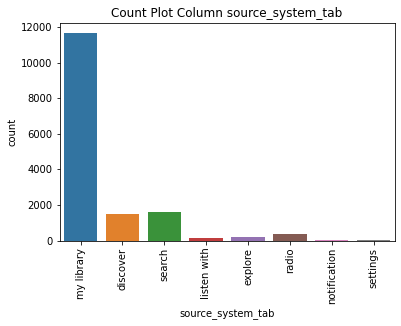

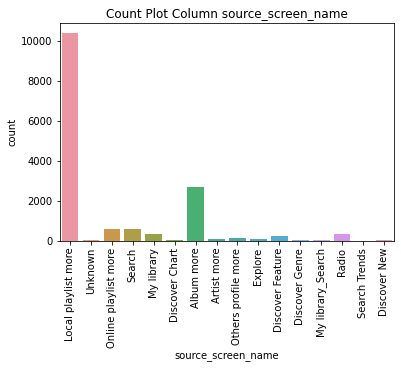

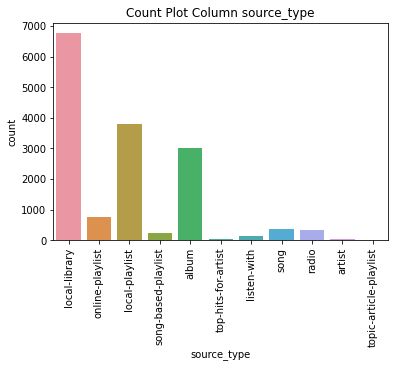

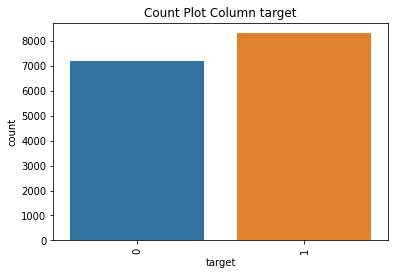

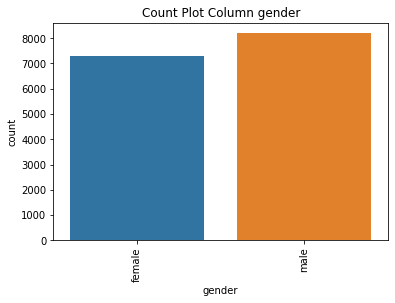

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['source_system_tab', 'source_screen_name', 'source_type', 'target', 'gender']

for col in range(len(cat_features)):
    plt.figure()
    plt.xticks(rotation=90)
    plt.title(f'Count Plot Column {cat_features[col]}')
    sns.countplot(df[cat_features[col]])

Disimpulkan fitur yang, akan diambil sudah tepat

label encoder untuk mengubah data kategorikal menjadi data number

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['song_id_le'] = le.fit_transform(df['song_id'])
df['source_system_tab'] = le.fit_transform(df['source_system_tab'])
df['source_screen_name'] = le.fit_transform(df['source_screen_name'])
df['source_type'] = le.fit_transform(df['source_type'])

Cek Korelasi

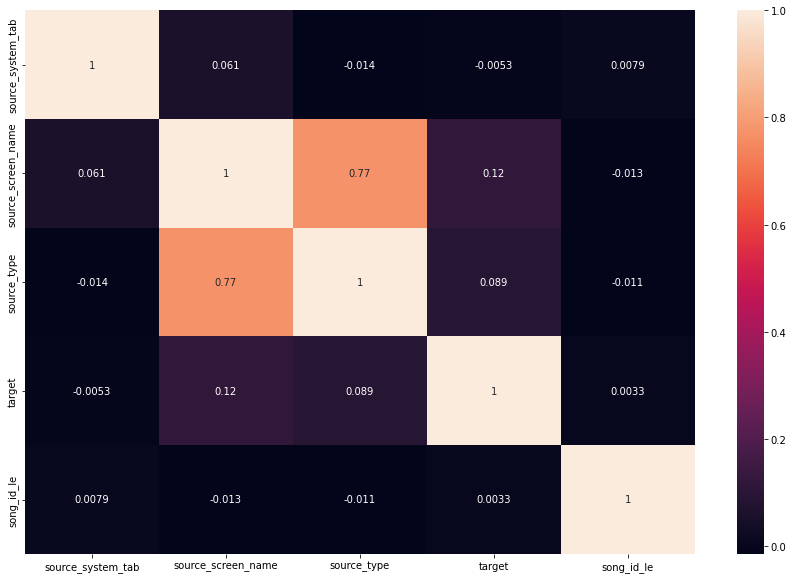

In [30]:
# Сorrelation matrix
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
df.reset_index(drop=True)

,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,gender,song_id_le
0,9yi9yLGK5Soiz1IO3iosDsx5O3hutglBHl1JbVHLjLw=,3,7,3,1,孫燕姿 (Yanzi Sun),465,female,3006
1,H0pfaBjENAn1eYhCA5+rurd8AnnJF17J512SKZBfvfU=,3,7,3,1,莫文蔚 (Karen Mok),465,female,4741
2,Prbb1SisBE80rnDae36BPKvkulEiXMssQvBfVCsHr38=,3,7,3,1,S.H.E,465,female,6811
3,lBYsvASSajQQPfE/o65Qy3FYsMHhbCmynFANAP29nks=,3,7,3,1,蔡依林 (Jolin Tsai),465,female,11975
4,aaosaazotfFOGS0pdK4RLNmLtezYXub2Gb6T6YGGObU=,0,15,5,0,王力宏 (Leehom Wang),458,male,9392
...,...,...,...,...,...,...,...,...,...
15488,EngT31aOui4ghNGEt68FOxnu8vmk2H99QQIP6LcUYww=,3,7,4,1,鄭秀文 (Sammi Cheng),465,male,4201
15489,4SqDkvUQe5B3IWLJG/nT/mnGNsIxx+yImUzFqOHg/ks=,3,7,4,1,貴族精選,2122,male,1645
15490,UioGHOgQQ/8I1F7UG3ShJonyj6ZOkFyUeHpor7Jbzc4=,3,7,4,1,莫文蔚 (Karen Mok),458,female,7997
15491,y8xAIq56kbwrdfmFfQRTOxhmUFjhVRrEvdl3syF8D6U=,0,0,0,0,王心凌 (Cyndi Wang),465,male,15050


# Modeling and Result

## Cosine Smiliarity / Content Based Similarity

Membuat dan menjelaskan sistem rekomendasi untuk menyelesaikan permasalahan

Menyajikan top-N recommendation sebagai output.

Menyajikan dua solusi rekomendasi dengan algoritma yang berbeda.

Menjelaskan kelebihan dan kekurangan pada pendekatan yang dipilih.

Cosine similarity mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Ia menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus, semakin besar nilai cosine similarity. 

Metrik ini sering digunakan untuk mengukur kesamaan dokumen dalam analisis teks. Sebagai contoh, dalam studi kasus ini, cosine similarity digunakan untuk mengukur kesamaan nama restoran dan nama masakan.

Maka dari itu saya gunakan Similarity untuk mencari kesamaan genre dan gender untuk rekomendasi

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()

cosim_df = cv.fit_transform(df['artist_name'])
cosine_sim = cosine_similarity(cosim_df)

lupa belum di label encoder, soalnya bukan inputan

In [33]:
df['artist_name'] = le.fit_transform(df['artist_name'])

In [34]:
def recommend_songs_to_you(df_resm, genre, gender):
  try:
    genre_gender_data = df_resm[(df_resm['gender'] == gender) & (df_resm['genre_ids'] == genre)]
    similar_songs = df_resm.copy()

    sound_prop = similar_songs.loc[:, ['song_id_le', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'artist_name']]

    similar_songs['Similarity with songs'] = cosine_similarity(sound_prop, sound_prop.to_numpy()[genre_gender_data.index[0], None]).squeeze()

    similar_songs.rename(columns={'genre_ids': f'Similar with genre ids {genre}'}, inplace=True)
    similar_songs['artist_name'] = le.inverse_transform(similar_songs['artist_name'])
    similar_songs = similar_songs.sort_values(by='Similarity with songs', ascending=False)
    similar_songs = similar_songs[['song_id', f'Similar with genre ids {genre}', 'artist_name', 'gender']]

    similar_songs.reset_index(drop=True, inplace=True)

    return similar_songs.iloc[1:7]
  except Exception as e:
    print('error: ', e)

top recommended songs

In [35]:
recommend_songs_to_you(df, '465', 'male')

,song_id,Similar with genre ids 465,artist_name,gender
1,+bzRWCwvoHacMsPkQ3Jmrh1MbglNiypd0AJ0p2bnnzk=,465,Various Artists,female
2,+lbvPHJMcegCSlBVvJToZsbIjQsxaNq47xU5vyYapmw=,921,五月天 (Mayday),female
3,+m8MlkHwqUeccI9+TZ/0oCQnLjm3nZQuVm9TqGFZcWE=,465,五月天 (Mayday),male
4,+fy1NsOrg5k5KwXdolS2P3aktNuU8Loo3AjdUJNbYyM=,921,Various Artists,male
5,+j10/5AhYRqlypDXRy/0/cVolyLClN4ap8v6flLnJAE=,465,五月天 (Mayday),male
6,+YNPKIOIi46G1WL0/mIlrJqToBDLlgMJWnb3RtSepwQ=,465,Various Artists,male


# Colaborative Filtering

Untuk Colaborative filtering yang akan saya gunakan adalah userid, songs name dan target

In [36]:
!7z e "../input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/kkbox-music-recommendation-challeng                                                      1 file, 103608205 bytes (99 MiB)

Extracting archive: ../input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z
--
Path = ../input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z
Type = 7z
Physical Size = 103608205
Headers Size = 140
Method = LZMA:25
Solid = -
Blocks = 1

      2% - song_extra_info.c                          5% - song_extra_info.c                          8% - song_extra_info.c                         11% - song_extra_info.c                         14% - song_extra_info.c                         17% - song_extra_info.c                         20% - song_extra_info.c                         23% - song_extra_info.c     

baca datasets, karena baru kali ini kita pakai datasets song_extra_info untuk mengambil judul lagu

In [37]:
song_info = pd.read_csv('./song_extra_info.csv')
song_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


merge semua data yang diperlukan

In [38]:
df = pd.merge(train_data, songs, on='song_id', how='left')

df = pd.merge(df, song_info, on='song_id', how='left')
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


handling null value

In [39]:
df.isnull().sum()

msno                        0
song_id                     0
source_system_tab       24849
source_screen_name     414804
source_type             21539
target                      0
song_length               114
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                  150
name                     1457
isrc                   577858
dtype: int64

ambil 100.000 sample

In [40]:
df = df.sample(n=100000)

In [41]:
df = df.reset_index(drop=True)

pilih column yang diperlukan

In [42]:
df = df[['target', 'msno', 'name']]

In [43]:
df

,target,msno,name
0,1,rMalezQzC/kRmr4/rsB0WK2rJandOHXxFlIQGYK7uvM=,簡單
1,1,kgihiLhHJEy4F3+ja4mVW+AiY8ZfIpzG4BnMsH6vnPA=,The Scientist
2,0,hwV8F+NZyYjOn+wsSNkqx5y78WcIai8RzNYD4fKWgX4=,不將就
3,0,riolLlVZU4qDZkOjd8Gj5rTHsZ6bxwAGTgMEbRepXnI=,All N My Grill
4,0,UkLcVxonUP+IIa3IZ09wDIS0bWNWHdGkErm4fEpWva8=,我賴你
...,...,...,...
99995,1,Zfmgvk5EM3tCGWmhI0b4l0Ip7vaFROBNt37r17lY964=,失憶的金魚
99996,1,wv0o115CdKSsFlsV7VvHikjyxLG0LFc5qALhM8xkUZ4=,角頭
99997,1,hKtU6JYcyPj8pHf+XuYco4NLJKBPPBYc2VtYkJVqBvw=,買你
99998,1,2a3SjjpUEzn2LX/lworFgkBikzGUxigGN9jIKxI2ZxY=,Messin' Around


Encode fitur msno / user id dan name atau nama lagunya

In [44]:
user_ids = df['msno'].unique().tolist()
song_ids = df['name'].unique().tolist()

Menyandikan (encode) fitur ‘msno’ dan ‘name’ ke dalam indeks integer. 

Memetakan ‘msno’ dan ‘name’ ke dataframe yang berkaitan.

Mengecek beberapa hal dalam data seperti jumlah user, jumlah lagu, kemudian mengubah target menjadi float.

In [45]:
# Melakukan encoding msno
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
# Melakukan proses encoding angka ke ke msno
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Melakukan proses encoding song
song_to_song_encoded = {x: i for i, x in enumerate(song_ids)}
 
# Melakukan proses encoding angka ke song
song_encoded_to_song = {i: x for i, x in enumerate(song_ids)}

# Mapping user ke dataframe user
df['msno'] = df['msno'].map(user_to_user_encoded)
 
# Mapping song ke dataframe song
df['name'] = df['name'].map(song_to_song_encoded)

# Mengubah target menjadi nilai float
df['target'] = df['target'].values.astype(np.float32)

# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah msno/user
num_song = len(song_encoded_to_song)
print(num_song)

20281
27617


In [46]:
# Mengacak Datasets
df = df.sample(frac=1, random_state=42)
df

,target,msno,name
75721,0.0,2615,131
80184,0.0,17653,21149
19864,0.0,8908,3581
76699,0.0,2584,1668
92991,0.0,1313,895
...,...,...,...
6265,0.0,4959,4173
54886,0.0,5350,2457
76820,1.0,1484,6373
860,1.0,418,780


Split dengan rasio 8:2

80.000 data train

20.000 data val

In [47]:
# Membuat variabel x untuk mencocokkan data user dan song menjadi satu value
x = df[['msno', 'name']].values
 
# Membuat variabel y untuk membuat target dari hasil 
y = df['target']
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Membuat Recommender Net berikut example nya

https://keras.io/examples/structured_data/collaborative_filtering_movielens/

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_song, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_song
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_song,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_song, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    song_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    song_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_song = tf.tensordot(user_vector, song_vector, 2) 
 
    x = dot_user_song + user_bias + song_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Compile model dengan loss RMSE

In [49]:
model = RecommenderNet(num_users, num_song, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2022-11-06 14:40:12.726610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 14:40:12.727576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 14:40:13.194463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 14:40:13.195272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 14:40:13.196015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [50]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

2022-11-06 14:40:19.019164: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
10000/10000 [==============================] - 38s 3ms/step - loss: 0.6872 - root_mean_squared_error: 0.4966 - val_loss: 0.6816 - val_root_mean_squared_error: 0.4933
Epoch 2/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.6545 - root_mean_squared_error: 0.4792 - val_loss: 0.6753 - val_root_mean_squared_error: 0.4895
Epoch 3/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.6270 - root_mean_squared_error: 0.4648 - val_loss: 0.6726 - val_root_mean_squared_error: 0.4877
Epoch 4/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.6036 - root_mean_squared_error: 0.4527 - val_loss: 0.6718 - val_root_mean_squared_error: 0.4871
Epoch 5/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.5830 - root_mean_squared_error: 0.4423 - val_loss: 0.6723 - val_root_mean_squared_error: 0.4870
Epoch 6/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.5667 - root_mean_squared_err

# Evaluation

Menyebutkan metrik evaluasi yang digunakan. RMSE

Menjelaskan hasil proyek berdasarkan metrik evaluasi.

Menjelaskan metrik evaluasi yang digunakan untuk mengukur kinerja model (formula dan cara metrik tersebut bekerja).

rmse = $\sqrt{\sum\nolimits_{n=1}^n \left((y_i - ŷ_p) ^ 2 \over n \right) }$  


Visualisasi Metrix untuk Melihat error dalam bentuk grafik

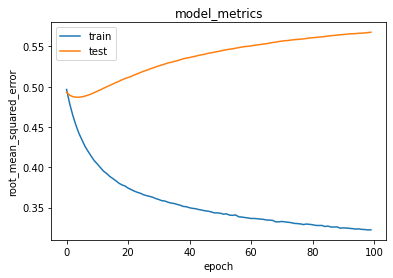

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
!7z e "../input/kkbox-music-recommendation-challenge/test.csv.7z"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/kkbox-music-recommendation-challeng                                                      1 file, 43925208 bytes (42 MiB)

Extracting archive: ../input/kkbox-music-recommendation-challenge/test.csv.7z
--
Path = ../input/kkbox-music-recommendation-challenge/test.csv.7z
Type = 7z
Physical Size = 43925208
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      4% - test.cs                9% - test.cs               16% - test.cs               21% - test.cs               27% - test.cs               33% - test.cs               39% - test.cs               45% - test.cs               50% - test.cs               56% - test.cs               60% - test.cs               65% - test.cs               71% - test.cs               77% - test.cs          

In [53]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [54]:
df_test.shape

(2556790, 6)

In [70]:
user_id = df_test.msno.sample(1).iloc[0]
music_listen_by_user = df_test[df_test.msno == user_id]

music_listen_by_user

,id,msno,song_id,source_system_tab,source_screen_name,source_type
103649,103649,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,X/ahpSXtVVsUh8MDmbPSYXFAWdIVDoJg2ll3xGT8iz4=,search,Artist more,top-hits-for-artist
103650,103650,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,HSNHTfJjX86DghFKZ/xtd92Ou8KOvnGoPWBQqcUFv1A=,search,Artist more,top-hits-for-artist
103651,103651,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,JVwoBKjxxE9L/IpNKsSCJJIYHcxvwxOKbFnM3TLwcTQ=,discover,Online playlist more,online-playlist
104550,104550,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,WOvHYkt7XUOtmMOTsgT+2vJKydJEVInZGliuLUXoV7o=,discover,Online playlist more,online-playlist
104551,104551,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,f5hbPY2JPa/OC0BOONNHrwbB7v6W/A6v8Whs674WYZU=,discover,Artist more,top-hits-for-artist
...,...,...,...,...,...,...
2430243,2430243,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,dcgQkyxkko0npGHMeAXwf9FDLpP8fBSpCwxC/qdNZRs=,my library,Local playlist more,local-library
2430246,2430246,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,xDXSo/OK524zQRa45u8/Ej5G3j+bP3tg2873ep5TZF0=,my library,Local playlist more,local-library
2430247,2430247,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,I7v9LoCZqYeOdX91k3u4XCkA9fU4qt7xykmBNxMRVP4=,my library,Local playlist more,local-library
2430249,2430249,ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=,B6490jDT/ZwXmpov0qfm2HUGcp6m5JFpqHtnoNExtnk=,my library,Local playlist more,local-library


Disini saya column song_id sudah di drop jadi load ulang

In [56]:
df = pd.merge(train_data, songs, on='song_id', how='left')

df = pd.merge(df, song_info, on='song_id', how='left')
df.head()
df.isnull().sum()
df = df.sample(n=100000)
df = df.reset_index(drop=True)
df = df[['target', 'msno', 'name', 'song_id']]

In [57]:
music_df = df

In [58]:
music_df

,target,msno,name,song_id
0,0,UhedBd3WDhhn5agK79mTtvE6Ue9ajwQUIRS1u1zzck8=,乾杯【五月天諾亞方舟世界巡迴演唱會LIVE版】,iTKN9DOouA4e84x2hhUnM8wmuIbQod043Wsqq7klQ7U=
1,1,0uczJdl6D1sYH4qn4ELBzKRLwyHWDrVt2kWMLcSq64g=,只能勇敢,gxzvL74hYqlvPuuu4Hl0nqdyNkEMLLclrnFKuYJM3lY=
2,1,TYiS1MLfT3pUomtCcqv5Ec0Zhz8Ni6EbH/Q6sXFbX3c=,帥到分手,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=
3,1,vsAgPRZ3Q4Fw5kghDz40WxqC7QRNHmGCAIxiOXYyn3c=,Fight Together,x84hZwbeT0y6hol7dFhbKD60xhnTfaIo9ooWFGBMOE4=
4,0,+ALnNsTguDiD99Kwrh81dwEw9zap4mi0+1h94dnDtJM=,You Are My Everything - Gummy,6HofPS0v2MVFsL10yCN7dXUL+gUOnvsD35vx3HmRbdE=
...,...,...,...,...
99995,1,HWriDxiPWEbXx5K43IaGSFn10AAhK5YKIA3eyTA4B5w=,告白氣球,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=
99996,1,IhcUemOIiEU96CwwJ3H5L01leWluYFtmUABy2l02o88=,冰雨,D0bp1y+3v9bQHuYaAEUwmi/DERTRiEXwTWOazvq6hnA=
99997,1,eJUmq++f9E+t5njc6unuZ7RFVhm4tmGG2rAe0nI8VQg=,Believe,TSYo73Gxa4tGwgtH64+HjNIbP1Rhtf3i9M58OIrzIMI=
99998,1,HSWOGtYIsI6L3YexPHTTQRI0TXrKo+KLmI3QpKeJK4c=,Party Monster,Tp37bk/x3F8bFpANiXXKtuLaaNtHDeQwsNUxYHNE4VY=


In [71]:
music_not_listen = music_df[~music_df['song_id'].isin(music_listen_by_user.song_id.values)]['name'] 
music_not_listen = list(
    set(music_not_listen)
    .intersection(set(song_to_song_encoded.keys()))
)
len(music_not_listen)

13885

In [72]:
music_not_listen = [[song_to_song_encoded.get(x)] for x in music_not_listen]

user_encoder = user_to_user_encoded.get(user_id)
user_song_array = np.hstack(
    ([[user_encoder]] * len(music_not_listen), music_not_listen)
)

In [73]:
len(user_song_array) - len([x for x in user_song_array if x is not None])

0

In [74]:
targets = model.predict(user_song_array).flatten()
targets

array([0.75489503, 0.9928692 , 0.6675399 , ..., 0.22048765, 0.94754755,
       0.23366542], dtype=float32)

In [76]:
top_ratings_indices = targets.argsort()[-10:][::-1]
recommended_song_ids = [
    song_encoded_to_song.get(music_not_listen[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('song with high ratings from user')
print('----' * 8)
 
top_song_user = (
    music_listen_by_user.sort_values(
        by = 'song_id',
        ascending=False
    )
    .head(5)
    .song_id.values
)
 
song_df_rows = music_df[music_df['song_id'].isin(top_song_user)]
for row in song_df_rows.head(5).itertuples():
    print(row.name)
 
print('----' * 8)
print('Top 10 song recommendation')
print('----' * 8)
 
recommended_song = music_df[music_df['name'].isin(recommended_song_ids)]
for row in recommended_song.head(10).itertuples():
    print(row.name)

Showing recommendations for users: ofjzUYkREGy1Se49aITIvrdW4SRzqyFGl2tvgSkDNIc=
song with high ratings from user
--------------------------------
人生的歌
月牙灣 (Crescent Bay)
月牙灣 (Crescent Bay)
愛到才知痛
人生的歌
--------------------------------
Top 10 song recommendation
--------------------------------
遠在眼前的你
Everyday
曹操
I Like That
曹操
Everyday
戰神
I Like That
曹操
戰神
